Examples:
Соревнования на Kaggle по распознаванию рукописных цифр | Нейросети в Google Colab: https://www.youtube.com/watch?v=zO0RAtZRkpc&ab_channel=AndreySozykin 

Kaggle API settings (5:28-

Download files from Kaggle Api: https://www.kaggle.com/general/74235 .


In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import SGD
import tensorflow
from sklearn.model_selection import train_test_split
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
%matplotlib inline

In [3]:
# Kaggle API settings
file = files.upload()
! ls # print what we have

Saving kaggle.json to kaggle.json
kaggle.json  sample_data


In [4]:
# Copy kaggle file in certain catalog
! mkdir ~/.kaggle
! mv kaggle.json ~/.kaggle

In [5]:
# Download data from project digit-recognizer
# "!" - command for linux
! chmod 600 /root/.kaggle/kaggle.json
! kaggle competitions download -c digit-recognizer #--force
! unzip digit-recognizer.zip #-d new_dir_digit_recognizer
! ls

  0% 0.00/15.3M [00:00<?, ?B/s]
100% 15.3M/15.3M [00:00<00:00, 202MB/s]
Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
digit-recognizer.zip  sample_data  sample_submission.csv  test.csv  train.csv


In [6]:
! head train.csv

label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel1

In [7]:
! head sample_submission.csv 

ImageId,Label
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


# Machine learning

In [8]:
# Get data from file
train_dataset = np.loadtxt('train.csv', skiprows=1, delimiter=',')
train_dataset[1:2]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  18.,  30., 137., 137., 192.,  86.,  72.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

In [9]:
# Get data for learning
x_train = train_dataset[:, 1:]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train[1:2]

array([[[[  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.]],

        [[  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.]],

        [[  0.],
         [  0.],
         [

In [10]:
# Normalization
x_train /= 255
x_train[1].shape

(28, 28, 1)

In [11]:
# Get right answers
y_train = train_dataset[:, 0]
y_train[:5]

array([1., 0., 1., 4., 0.])

In [12]:
# Converting to one hot encoding format
# Info about it: https://www.educative.io/blog/one-hot-encoding 
y_train = utils.to_categorical(y_train)
y_train[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
# random_state - check how it works
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=random_seed)

In [14]:
datagen = ImageDataGenerator(
    rotation_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1)

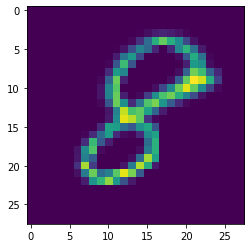

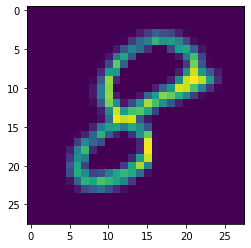

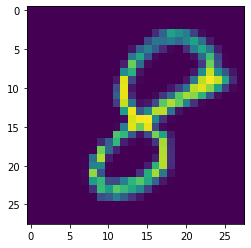

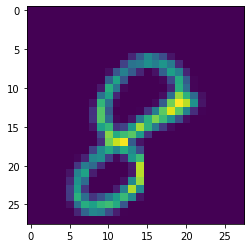

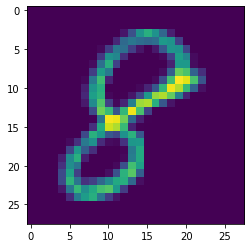

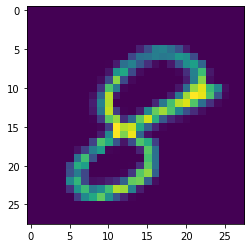

In [15]:
i = 0
data = X_train[0]
data = np.expand_dims(data, axis=0)
for batch in datagen.flow(data, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(batch[0][:,:,0])
  i += 1
  if i % 6 == 0:
    break
  plt.show

In [16]:
# Create neural network

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                 activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                 activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [17]:
# Compiling the network

model.compile(loss='categorical_crossenrtropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [18]:
# Training a neural network

checkpoint = ModelCheckpoint('mnist-cnn.hdf5',
                             monitor='val_acc',
                             save_best_only=True,
                             verbose=1)

In [20]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [22]:
batch_size = 96

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [34]:
history = model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    epochs=30,
                    validation_data=(X_val, Y_val),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    verbose=1,
                    callbacks=[checkpoint, learning_rate_reduction])

Epoch 1/30
393/393 [==============================] - ETA: 0s - loss: 1.4204 - accuracy: 0.5208

393/393 [==============================] - 11s 28ms/step - loss: 1.4204 - accuracy: 0.5208 - val_loss: 0.4290 - val_accuracy: 0.8864 - lr: 0.0100
Epoch 2/30
393/393 [==============================] - ETA: 0s - loss: 0.7095 - accuracy: 0.7739

393/393 [==============================] - 10s 26ms/step - loss: 0.7095 - accuracy: 0.7739 - val_loss: 0.2322 - val_accuracy: 0.9333 - lr: 0.0100
Epoch 3/30
392/393 [============================>.] - ETA: 0s - loss: 0.4665 - accuracy: 0.8535

393/393 [==============================] - 10s 26ms/step - loss: 0.4663 - accuracy: 0.8535 - val_loss: 0.1632 - val_accuracy: 0.9510 - lr: 0.0100
Epoch 4/30
392/393 [============================>.] - ETA: 0s - loss: 0.3702 - accuracy: 0.8837

393/393 [==============================] - 11s 27ms/step - loss: 0.3699 - accuracy: 0.8837 - val_loss: 0.1295 - val_accuracy: 0.9600 - lr: 0.0100
Epoch 5/30
392/393 [============================>.] - ETA: 0s - loss: 0.3099 - accuracy: 0.9043

393/393 [==============================] - 10s 27ms/step - loss: 0.3097 - accuracy: 0.9043 - val_loss: 0.1126 - val_accuracy: 0.9660 - lr: 0.0100
Epoch 6/30
392/393 [============================>.] - ETA: 0s - loss: 0.2729 - accuracy: 0.9166

393/393 [==============================] - 11s 28ms/step - loss: 0.2731 - accuracy: 0.9166 - val_loss: 0.1014 - val_accuracy: 0.9667 - lr: 0.0100
Epoch 7/30
393/393 [==============================] - ETA: 0s - loss: 0.2418 - accuracy: 0.9257

393/393 [==============================] - 11s 28ms/step - loss: 0.2418 - accuracy: 0.9257 - val_loss: 0.0959 - val_accuracy: 0.9710 - lr: 0.0100
Epoch 8/30
392/393 [============================>.] - ETA: 0s - loss: 0.2255 - accuracy: 0.9319

393/393 [==============================] - 10s 27ms/step - loss: 0.2254 - accuracy: 0.9319 - val_loss: 0.0855 - val_accuracy: 0.9726 - lr: 0.0100
Epoch 9/30
391/393 [============================>.] - ETA: 0s - loss: 0.2085 - accuracy: 0.9374

393/393 [==============================] - 10s 26ms/step - loss: 0.2080 - accuracy: 0.9376 - val_loss: 0.0867 - val_accuracy: 0.9731 - lr: 0.0100
Epoch 10/30
393/393 [==============================] - ETA: 0s - loss: 0.1928 - accuracy: 0.9422

393/393 [==============================] - 10s 27ms/step - loss: 0.1928 - accuracy: 0.9422 - val_loss: 0.0756 - val_accuracy: 0.9774 - lr: 0.0100
Epoch 11/30
393/393 [==============================] - ETA: 0s - loss: 0.1859 - accuracy: 0.9441

393/393 [==============================] - 10s 26ms/step - loss: 0.1859 - accuracy: 0.9441 - val_loss: 0.0691 - val_accuracy: 0.9776 - lr: 0.0100
Epoch 12/30
392/393 [============================>.] - ETA: 0s - loss: 0.1715 - accuracy: 0.9488

393/393 [==============================] - 10s 26ms/step - loss: 0.1717 - accuracy: 0.9487 - val_loss: 0.0658 - val_accuracy: 0.9802 - lr: 0.0100
Epoch 13/30
392/393 [============================>.] - ETA: 0s - loss: 0.1680 - accuracy: 0.9498

393/393 [==============================] - 11s 27ms/step - loss: 0.1680 - accuracy: 0.9498 - val_loss: 0.0635 - val_accuracy: 0.9790 - lr: 0.0100
Epoch 14/30
392/393 [============================>.] - ETA: 0s - loss: 0.1576 - accuracy: 0.9512

393/393 [==============================] - 11s 27ms/step - loss: 0.1579 - accuracy: 0.9511 - val_loss: 0.0592 - val_accuracy: 0.9810 - lr: 0.0100
Epoch 15/30
392/393 [============================>.] - ETA: 0s - loss: 0.1513 - accuracy: 0.9542

393/393 [==============================] - 10s 26ms/step - loss: 0.1512 - accuracy: 0.9542 - val_loss: 0.0575 - val_accuracy: 0.9812 - lr: 0.0100
Epoch 16/30
393/393 [==============================] - ETA: 0s - loss: 0.1449 - accuracy: 0.9554

393/393 [==============================] - 10s 27ms/step - loss: 0.1449 - accuracy: 0.9554 - val_loss: 0.0555 - val_accuracy: 0.9829 - lr: 0.0100
Epoch 17/30
392/393 [============================>.] - ETA: 0s - loss: 0.1393 - accuracy: 0.9577

393/393 [==============================] - 11s 27ms/step - loss: 0.1392 - accuracy: 0.9577 - val_loss: 0.0571 - val_accuracy: 0.9824 - lr: 0.0100
Epoch 18/30
393/393 [==============================] - ETA: 0s - loss: 0.1370 - accuracy: 0.9591

393/393 [==============================] - 10s 27ms/step - loss: 0.1370 - accuracy: 0.9591 - val_loss: 0.0552 - val_accuracy: 0.9831 - lr: 0.0100
Epoch 19/30
393/393 [==============================] - ETA: 0s - loss: 0.1346 - accuracy: 0.9595

393/393 [==============================] - 11s 27ms/step - loss: 0.1346 - accuracy: 0.9595 - val_loss: 0.0524 - val_accuracy: 0.9838 - lr: 0.0100
Epoch 20/30
393/393 [==============================] - ETA: 0s - loss: 0.1260 - accuracy: 0.9612

393/393 [==============================] - 10s 27ms/step - loss: 0.1260 - accuracy: 0.9612 - val_loss: 0.0496 - val_accuracy: 0.9864 - lr: 0.0100
Epoch 21/30
393/393 [==============================] - ETA: 0s - loss: 0.1257 - accuracy: 0.9616

393/393 [==============================] - 13s 33ms/step - loss: 0.1257 - accuracy: 0.9616 - val_loss: 0.0483 - val_accuracy: 0.9850 - lr: 0.0100
Epoch 22/30
393/393 [==============================] - ETA: 0s - loss: 0.1176 - accuracy: 0.9643

393/393 [==============================] - 11s 29ms/step - loss: 0.1176 - accuracy: 0.9643 - val_loss: 0.0468 - val_accuracy: 0.9855 - lr: 0.0100
Epoch 23/30
393/393 [==============================] - ETA: 0s - loss: 0.1149 - accuracy: 0.9653

393/393 [==============================] - 11s 29ms/step - loss: 0.1149 - accuracy: 0.9653 - val_loss: 0.0488 - val_accuracy: 0.9867 - lr: 0.0100
Epoch 24/30
393/393 [==============================] - ETA: 0s - loss: 0.1154 - accuracy: 0.9653

393/393 [==============================] - 12s 30ms/step - loss: 0.1154 - accuracy: 0.9653 - val_loss: 0.0468 - val_accuracy: 0.9864 - lr: 0.0100
Epoch 25/30
392/393 [============================>.] - ETA: 0s - loss: 0.1136 - accuracy: 0.9661

393/393 [==============================] - 13s 32ms/step - loss: 0.1143 - accuracy: 0.9661 - val_loss: 0.0432 - val_accuracy: 0.9876 - lr: 0.0100
Epoch 26/30
391/393 [============================>.] - ETA: 0s - loss: 0.1104 - accuracy: 0.9669

393/393 [==============================] - 11s 27ms/step - loss: 0.1105 - accuracy: 0.9670 - val_loss: 0.0443 - val_accuracy: 0.9857 - lr: 0.0100
Epoch 27/30
393/393 [==============================] - ETA: 0s - loss: 0.1096 - accuracy: 0.9668

393/393 [==============================] - 10s 26ms/step - loss: 0.1096 - accuracy: 0.9668 - val_loss: 0.0395 - val_accuracy: 0.9876 - lr: 0.0100
Epoch 28/30
391/393 [============================>.] - ETA: 0s - loss: 0.1069 - accuracy: 0.9688

393/393 [==============================] - 10s 26ms/step - loss: 0.1070 - accuracy: 0.9688 - val_loss: 0.0422 - val_accuracy: 0.9869 - lr: 0.0100
Epoch 29/30
393/393 [==============================] - ETA: 0s - loss: 0.1018 - accuracy: 0.9702

393/393 [==============================] - 10s 26ms/step - loss: 0.1018 - accuracy: 0.9702 - val_loss: 0.0417 - val_accuracy: 0.9879 - lr: 0.0100
Epoch 30/30
392/393 [============================>.] - ETA: 0s - loss: 0.1012 - accuracy: 0.9699

393/393 [==============================] - 10s 26ms/step - loss: 0.1010 - accuracy: 0.9700 - val_loss: 0.0388 - val_accuracy: 0.9888 - lr: 0.0100


In [19]:
model.load_weights('mnist-cnn-.hdf5')

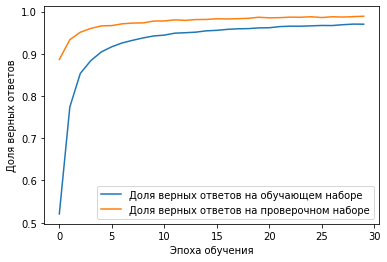

In [37]:
# Visualization

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [50]:
# Uploading data for recognition

test_dataset = np.loadtxt('test.csv', skiprows=1, delimiter=',')
test_dataset[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
x_test = test_dataset.reshape(test_dataset.shape[0], 28, 28, 1)

In [52]:
x_test /= 255.0

In [53]:
# Recognition of digits from a test set

predictions = model.predict(x_test)

In [54]:
predictions = np.argmax(predictions, axis=1)

In [55]:
predictions

array([2, 0, 9, ..., 3, 9, 2])

In [56]:
# Prepare file for Kaggle

out = np.column_stack((range(1, predictions.shape[0]+1), predictions))

In [57]:
out[:5]

array([[1, 2],
       [2, 0],
       [3, 9],
       [4, 0],
       [5, 3]])

In [61]:
np.savetxt('submission.csv', out, header='ImageId,Label', comments='', fmt='%d,%d')

In [62]:
! head submission.csv

ImageId,Label
1,2
2,0
3,9
4,0
5,3
6,9
7,0
8,3
9,0


In [63]:
# Send results to Kaggle

! kaggle competitions submit -c digit-recognizer -m 'Submition from Colab' -f submission.csv

100% 208k/208k [00:00<00:00, 552kB/s]
Successfully submitted to Digit Recognizer